In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, util, filters, morphology
from skimage.morphology import disk, erosion, closing, square, diamond, dilation, black_tophat, white_tophat, opening

1 (a) Lakukan berbagai percobaan manipulasi citra dengan morphology transformation hingga mendapatkan citra yang mirip dengan (b) Shape After

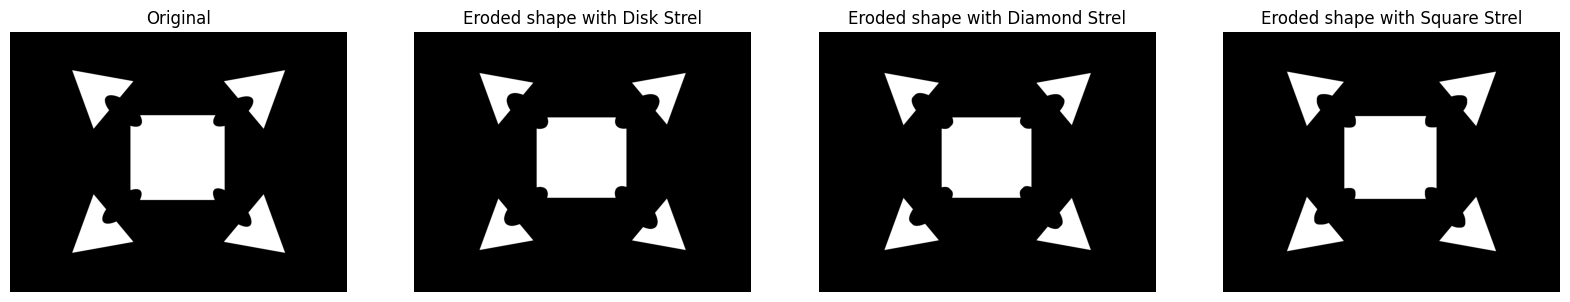

In [3]:
shape1 = io.imread("./shape.png")

if shape1.shape[2] == 4:
    shape1 = shape1[:, :, :3]

shape1 = color.rgb2gray(shape1)

strels = {
    "Disk": disk(10),
    "Diamond": diamond(10),
    "Square": square(10)
}

plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(shape1, cmap="gray")
plt.axis("off")
    
plot_counter = 1
for shape, strel in strels.items():
    erodedShape = erosion(shape1, strel)
    plt.subplot(1,4, 1+plot_counter)
    plt.title(f"Eroded shape with {shape} Strel")
    plt.imshow(erodedShape, cmap="gray")
    plt.axis("off")
    plot_counter += 1
plt.show()

# eroting = erosion(shape1, square(50))
# dilating = dilation(shape1, disk(40))
# trying = erosion(shape1, diamond(70))
# trying = dilation(trying, disk(70))
# plt.subplot(1,2,2)
# plt.title("trying")
# plt.imshow(trying)




Dari hasil gambar yang dilampirkan di atas, masih sangat kecil perubahan yang terlihat sehingga kita akan melakukan beberapa iterasi yang setiap iterasinya ukuran dari strel akan dinaikan sebanyak 10 sampai kita mendapatkan bentuk yang kita inginkan.

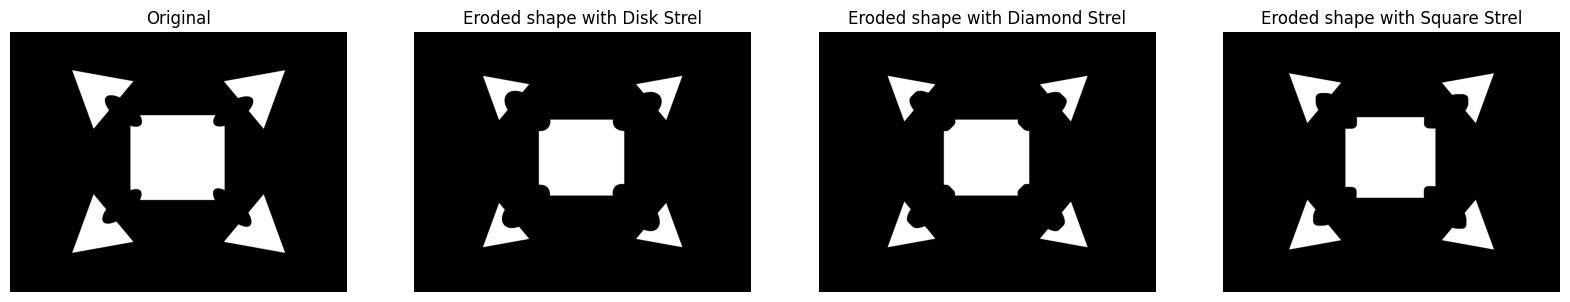

In [4]:
strels = {
    "Disk": disk(20),
    "Diamond": diamond(20),
    "Square": square(20)
}

plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(shape1, cmap="gray")
plt.axis("off")
    
plot_counter = 1
for shape, strel in strels.items():
    erodedShape = erosion(shape1, strel)
    plt.subplot(1,4, 1+plot_counter)
    plt.title(f"Eroded shape with {shape} Strel")
    plt.imshow(erodedShape, cmap="gray")
    plt.axis("off")
    plot_counter += 1
plt.show()

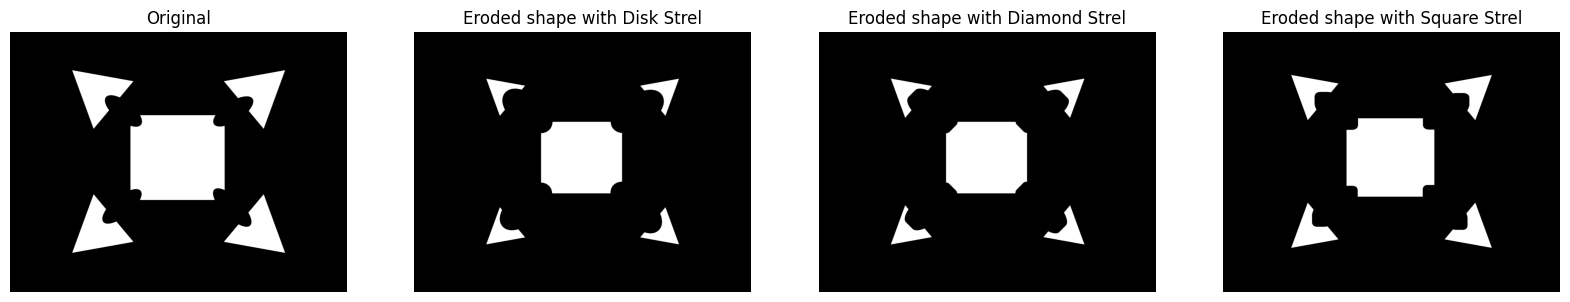

In [5]:
strels = {
    "Disk": disk(30),
    "Diamond": diamond(30),
    "Square": square(30)
}

plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(shape1, cmap="gray")
plt.axis("off")
    
plot_counter = 1
for shape, strel in strels.items():
    erodedShape = erosion(shape1, strel)
    plt.subplot(1,4, 1+plot_counter)
    plt.title(f"Eroded shape with {shape} Strel")
    plt.imshow(erodedShape, cmap="gray")
    plt.axis("off")
    plot_counter += 1
plt.show()

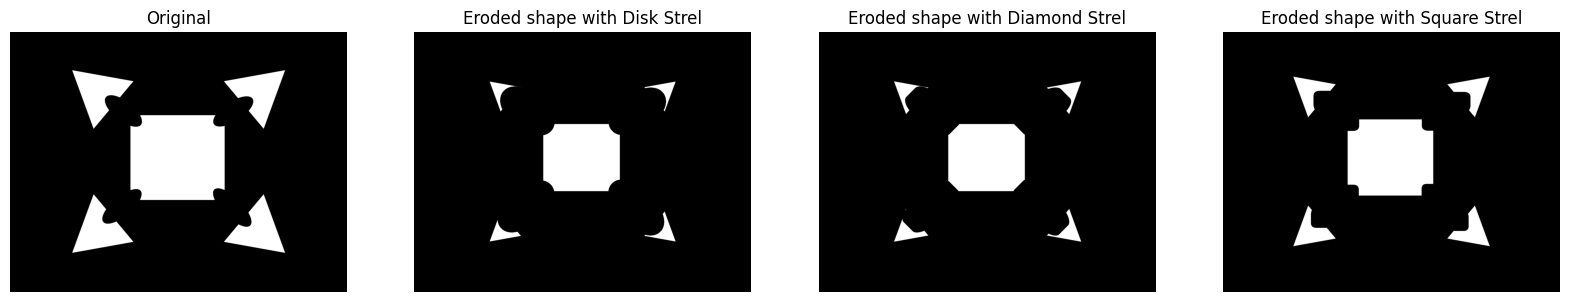

In [6]:
strels = {
    "Disk": disk(40),
    "Diamond": diamond(40),
    "Square": square(40)
}

plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(shape1, cmap="gray")
plt.axis("off")
    
plot_counter = 1
for shape, strel in strels.items():
    erodedShape = erosion(shape1, strel)
    plt.subplot(1,4, 1+plot_counter)
    plt.title(f"Eroded shape with {shape} Strel")
    plt.imshow(erodedShape, cmap="gray")
    plt.axis("off")
    plot_counter += 1
plt.show()

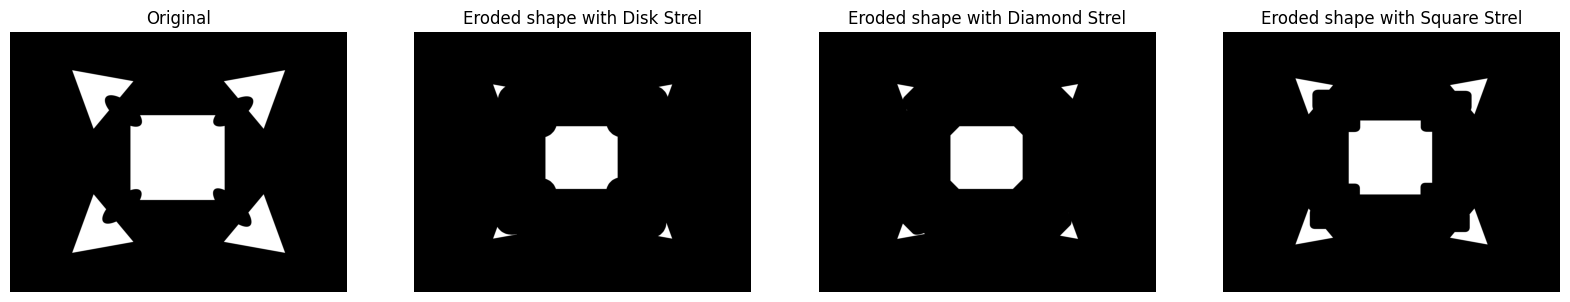

In [7]:
strels = {
    "Disk": disk(50),
    "Diamond": diamond(50),
    "Square": square(50)
}

plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(shape1, cmap="gray")
plt.axis("off")
    
plot_counter = 1
for shape, strel in strels.items():
    erodedShape = erosion(shape1, strel)
    plt.subplot(1,4, 1+plot_counter)
    plt.title(f"Eroded shape with {shape} Strel")
    plt.imshow(erodedShape, cmap="gray")
    plt.axis("off")
    plot_counter += 1
plt.show()

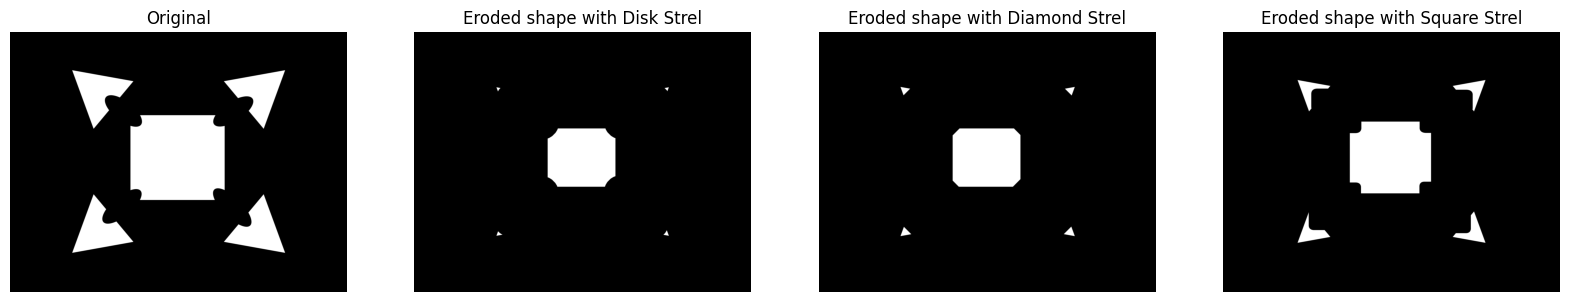

In [8]:
strels = {
    "Disk": disk(60),
    "Diamond": diamond(60),
    "Square": square(60)
}

plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(shape1, cmap="gray")
plt.axis("off")
    
plot_counter = 1
for shape, strel in strels.items():
    erodedShape = erosion(shape1, strel)
    plt.subplot(1,4, 1+plot_counter)
    plt.title(f"Eroded shape with {shape} Strel")
    plt.imshow(erodedShape, cmap="gray")
    plt.axis("off")
    plot_counter += 1
plt.show()

Tujuan gambar yang kita ingin dapatkan adalah bentuk segitiga yang kemudian berubah menjadi lingkaran dan bentuk persegi di tengah yang kemudian ujungnya menjadi rounded dimana sebelumnya terdapat bagian yang kosong. Pada hasil erosi pada iterasi ke-6, baigan strel dengan diamond, kita sudah mendapatkan bentuk segitiga kecil utuh yang tidak terdapat bolongan di bagian badannya dan lubang pada sudut persegi juga sudah tertutupi. Maka dari itu, kita dapat melakukan dilasi untuk menambahkan piksel pada boundaries objek dengan memanfaatkan bentuk disk sehingga kita bisa mendapatkan bentuk lingkaran yang sempurna ganti segitiga dan ujung rounded pada bentuk persegi sesuai dengan yang kita inginkan. 

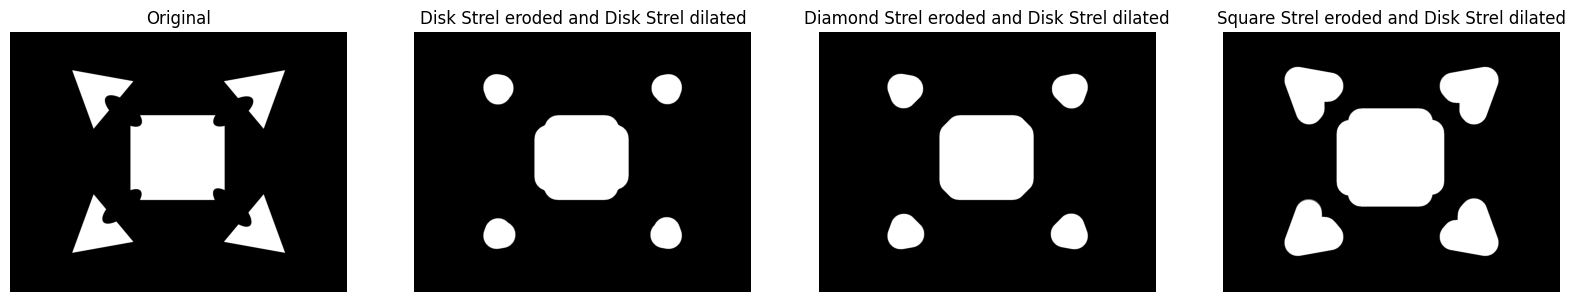

In [9]:
strels = {
    "Disk": disk(60),
    "Diamond": diamond(60),
    "Square": square(60)
}

plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(shape1, cmap="gray")
plt.axis("off")
    
plot_counter = 1
for shape, strel in strels.items():
    erodedShape = erosion(shape1, strel)
    erodedShape = dilation(erodedShape, disk(60))
    plt.subplot(1,4, 1+plot_counter)
    plt.title(f"{shape} Strel eroded and Disk Strel dilated")
    plt.imshow(erodedShape, cmap="gray")
    plt.axis("off")
    plot_counter += 1
plt.show()

Pada percobaan di atas hasil visualisasi sudah lumayan menyerupai dengan citra shape after yang kita inginkan namun masih kurang bulat sehingga kita coba untuk tambahkan kembali ukuran strel

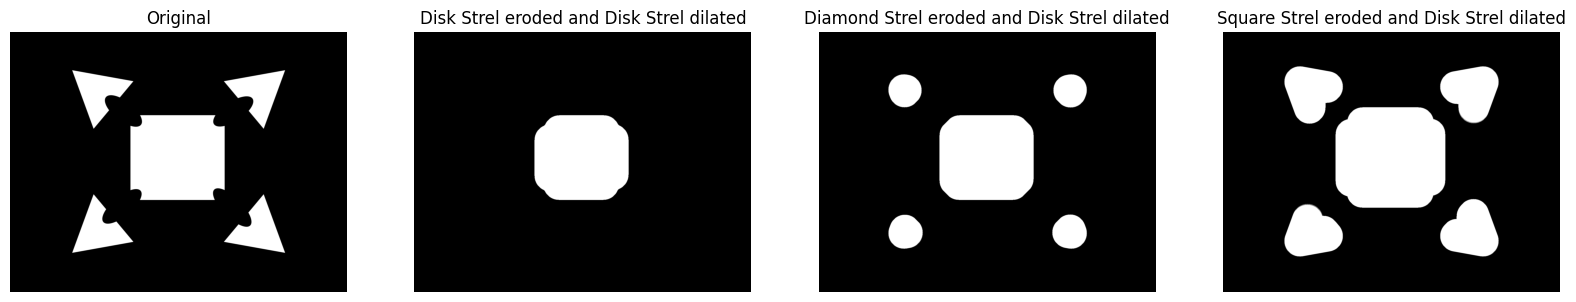

In [10]:
strels = {
    "Disk": disk(70),
    "Diamond": diamond(70),
    "Square": square(70)
}

plt.figure(figsize=(20,7))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(shape1, cmap="gray")
plt.axis("off")
    
plot_counter = 1
for shape, strel in strels.items():
    erodedShape = erosion(shape1, strel)
    erodedShape = dilation(erodedShape, disk(70))
    plt.subplot(1,4, 1+plot_counter)
    plt.title(f"{shape} Strel eroded and Disk Strel dilated")
    plt.imshow(erodedShape, cmap="gray")
    plt.axis("off")
    plot_counter += 1
plt.show()

Dari hasil visualisasi di atas dapat kita lihat bahwa bentuk shape after yang diinginkan sudah kita dapatkan, yaitu dengan melakukan erosi dengan strel bentuk diamond yang kemudian dilakukan dilasi dengan bentuk disk dengan ukuran shape setiap strel 70.

**1.b Jelaskan dengan jelas mengapa Anda mengerjakan poin a dengan cara tersebut!**

Saya mengerjakan poin a dengan cara di atas dikarenakan kita kita tidak tahu bentuk strel mana yang ketika kita lakukan erosi akan menghasilkan bentuk yang kita inginkan paling cepat, dalam kasus ini menghilangkan lubang pada alas segitiga dan lubang pada sudut persegi di gambar yang kita miliki, maka untuk mencari yang terbaik kita coba setiap bentuk strel tersebut. Selain itu, karena kita juga belum mengetahui ukuran strel yang ideal maka kita lakukan beberapa iterasi untuk mencari ukuran yang ideal sampai mendapatkan bentuk yang kita inginkan. Setelah kita erosi, maka kita akan lakukan dilasi dengan bentuk strel disk dimana sesuai denagn bentuk shape after yang ingin kita tiru gambarnya. Kita ingin mendapatkann hasil bentuk lingkaran dari segitiga dan sudut yang tumpul (rounded) dari persegi pada gambar yang kita miliki, maka bentuk ideal untuk digunakann pada proses dilasi adalah disk yang kemudian kita lakukan menyesuaikan dengan ukuran dari strel erosi yang kita lakukan. Hal tersebut bertujuan untuk mengembalikan ukuran sebelumnya sehingga ukuran bentuk untuk dilasi juga 70.

2.a Lakukan berbagai percobaan manipulasi citra dengan morphology transformation hingga mendapatkan citra yang mirip dengan (b) AI After!


(-0.5, 498.5, 453.5, -0.5)

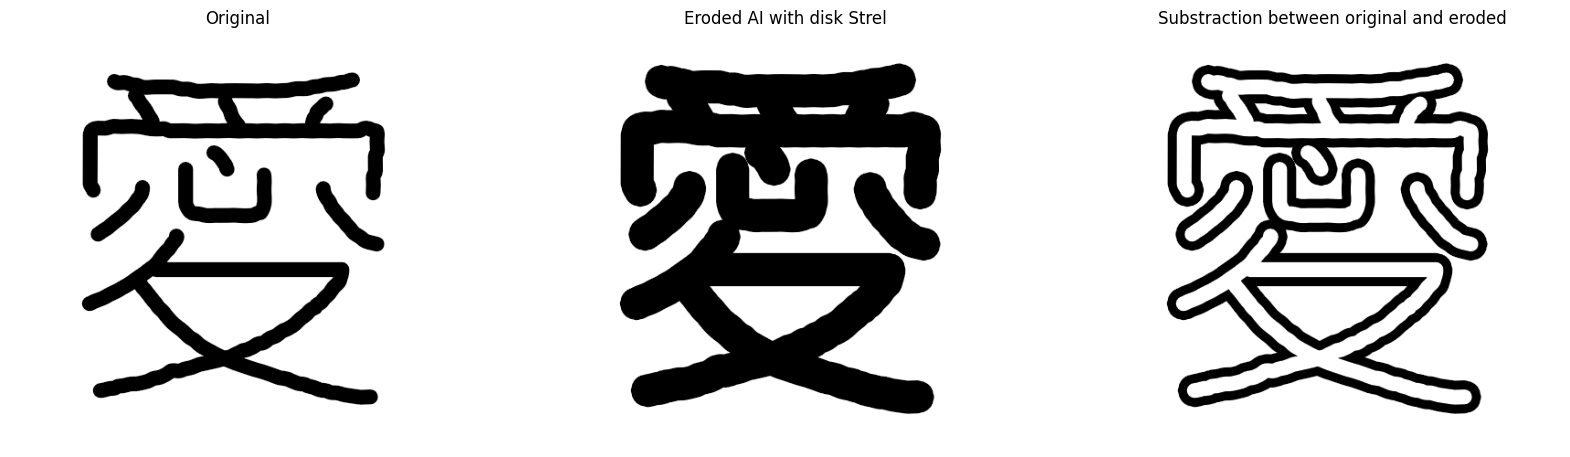

In [14]:
shape2 = io.imread("./AI.png")

if shape2.shape[2] == 4:
    shape2 = shape2[:, :, :3]

shape2 = color.rgb2gray(shape2)

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(shape2, cmap="gray")
plt.axis("off")

erodedShape2 = erosion(shape2, disk(10))
plt.subplot(1,3,2)
plt.title("Eroded AI with disk Strel")
plt.imshow(erodedShape2, cmap="gray")
plt.axis("off")

res = erodedShape2-shape2
plt.subplot(1,3,3)
plt.title("Substraction between original and eroded")
plt.imshow(res, cmap="gray")
plt.axis("off")


2.b Ceritakan mengapa Anda mengerjakan poin a dengan cara tersebut!

Untuk nomor 2 ini gambar AI after yang ingin didapatkan adalah bentuk dari original yang memiliki list hitam dengan latar background putih seperti gambar awal. Kita dapat memperoleh gambar tersebut dengan membaut gambar original yang dilakukan erosi sehingga ketebalannya meningkat yang kemudian dikurangkan dengan gambar original awal yang belum ditebalkan. Dengan begitu maka area tengah dari gambar yang sudah ditebalkan akan hilang dan menyisakan background yang yang berwanra putih dengan masih menyisakan bekas penebalan yang kemudian akan terlihat seperti list hitam seperti yang dapat dilihat pada hasil visualisasi di atas.

3.a Terapkan operasi morfologis yang paling tepat pada kedua citra di atas sesuai deskripsi soal.


(-0.5, 1647.5, 4733.5, -0.5)

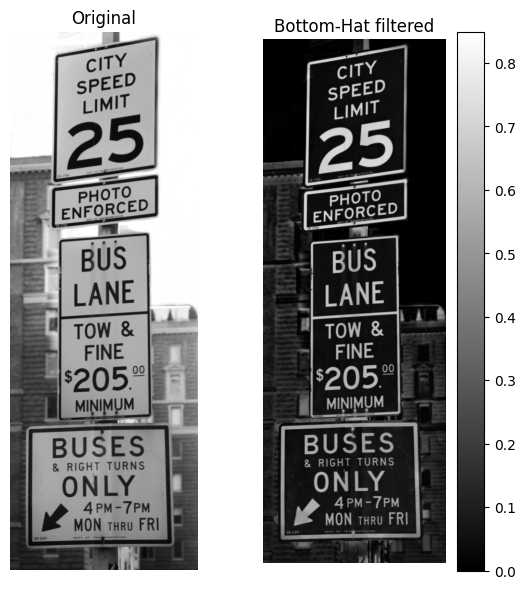

In [50]:
shape3 = io.imread("./road_sign1.jpg")

if shape3.shape[2] == 4:
    shape3 = shape3[:, :, :3]

shape3 = color.rgb2gray(shape3)

plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(shape3, cmap="gray")
plt.axis("off")

trying = black_tophat(shape3, disk(60))
plt.subplot(1,3,2)
plt.title("Bottom-Hat filtered")
plt.imshow(trying, cmap="gray")
plt.colorbar()
plt.axis("off")


(-0.5, 1647.5, 4733.5, -0.5)

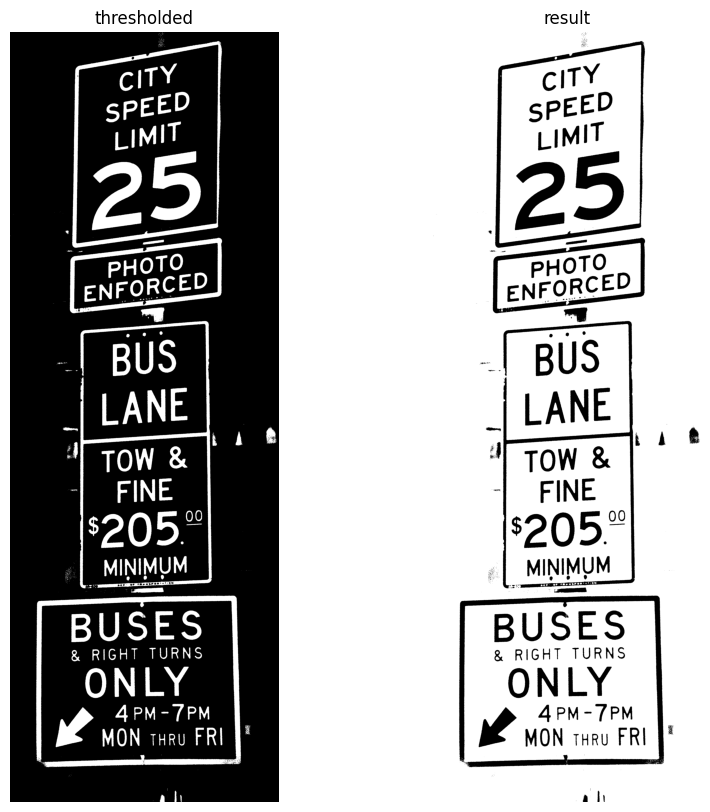

In [51]:
thresholded = trying > 0.4
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("thresholded")
plt.imshow(thresholded, cmap="gray")
plt.axis("off")

result = np.invert(thresholded)
plt.subplot(1,2,2)
plt.title("result")
plt.imshow(result, cmap="gray")
plt.axis("off")

Untuk citra road_sign1 di atas operasi morfologis yang saya gunakan adalah bottom-hat filter yang berfungsi untuk mengekstrak detail-detail gelap pada citra yang mana sesuai dengan kasus di atas dimana tulisan yang ingin diekstrak merupakan warna hitam. Kemudian, dikarenakan hasil dari bottom-hat filter terdapat detail-detail selain pada teks yang ingin diekstrak, maka yang saya lakukan adalah menentukan threshold dari citra tersebut. Dengan begitu kita dapat menentukan intensitas mana yang ingin kita tonjolkan. Setelah itu saya memanfaatkan function invert untuk mengembalikan background menjadi warna putih dan teks yang sudah berhasil diekstrak menjadi warna hitam.

(-0.5, 2502.5, 3760.5, -0.5)

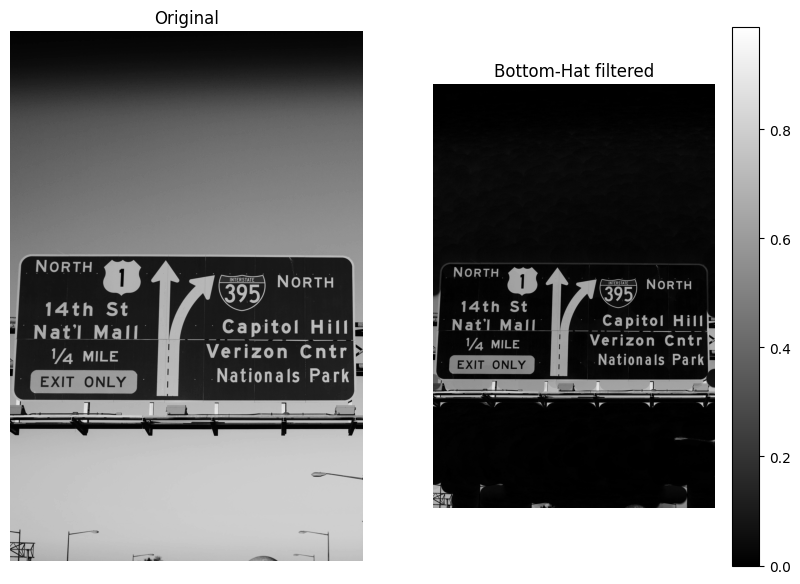

In [56]:
shape4 = io.imread("./road_sign2.jpg")

if shape4.shape[2] == 4:
    shape4 = shape3[:, :, :3]

shape4 = color.rgb2gray(shape4)

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(shape4, cmap="gray")
plt.axis("off")

trying = white_tophat(shape4, disk(70))
plt.subplot(1,2,2)
plt.title("Bottom-Hat filtered")
plt.imshow(trying, cmap="gray")
plt.colorbar()
plt.axis("off")


(-0.5, 2502.5, 3760.5, -0.5)

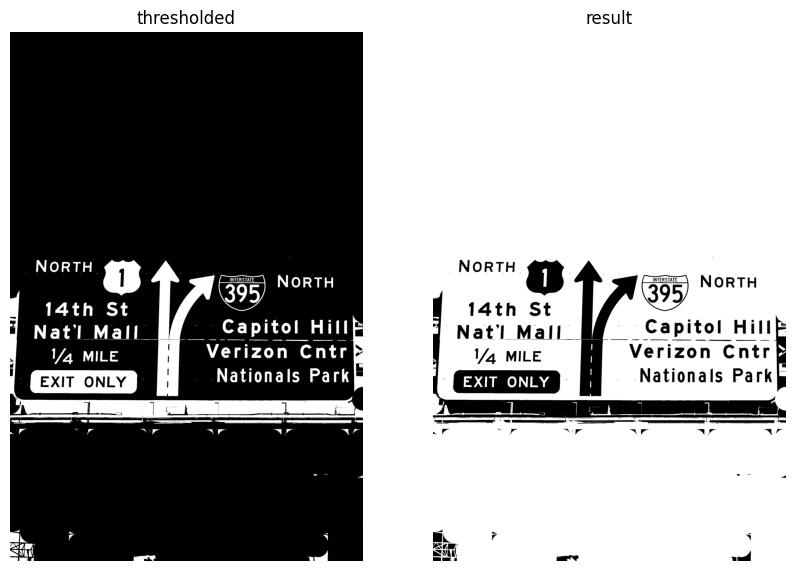

In [57]:
thresholded = trying > 0.4
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("thresholded")
plt.imshow(thresholded, cmap="gray")
plt.axis("off")

result = np.invert(thresholded)
plt.subplot(1,2,2)
plt.title("result")
plt.imshow(result, cmap="gray")
plt.axis("off")

Untuk citra road_sign2 operasi morfologi yang saya gunakan adalah top-hat filter yang berguna untuk mengekstrak detail-detail terang pada latar yang gelap. Hal tersebut sangat cocok untuk dimanfaatkan untuk citra road_sign2 dimana teks yang ingin diekstrak, sebagian besar, memiliki warna yang terang atau bernuansa putih. Kemudian kita melakukan thresholding sama seperti yang kita lakukan pada citra road_sign1 dengan menampilkan colorbar sehingga kita bisa menentukan nilai threshold berapa atau nilai intensitas mana yang ingin ditonjolkan. Kemudian kita manfaatkan function invert untuk mengembalikan background menjadi warna putih dan tulisan yang sudah berhasil diesktrak menjadi warna hitam seperti visualisasi di atas yang berjudul result. 